# Opening

Boothcamp JAP Rakamin, About Me: 
* Name             	: Mohamad Reza Syahziar
* Hiring Status	    : Actively looking for jobs
* Education	        : Computational Science
* Tools Mastery     : Python for data science, SQL, Google BigQuery, Google Data Studio, Ms.Excel

# Background

Pada projek ini kita akan melakukan pemodelan machine learning, untuk memprediksi apakah customer Target memiliki masalah atau tidak dalam peminjaman kredit untuk meningkatkan pemilihan kustomer untuk peminjaman kredit. Kata dapat berasusmsi bahwa diri kita sebagai Data Scientist pada perusahaan di bidang consultant digital marketing.

# Problem

Tim bisnis ingin mengoptimalkan metode cara menentukan customer yang dapat diberikan pinjaman kredit. Agar cost dan resiko yang akan dikeluarkan tidak terlalu besar.

# Goals

Membuat machine learning model yang dapat mendeteksi potential customer yang dapat diberikan pinjaman kredit. Sehingga kita bisa mengoptimalkan cost dan mengurangi resiko tidak dikembalikannya pinjaman.

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from datetime import datetime as dt

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

from collections import defaultdict
import ppscore as pps

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
## UDF for experimenting several classification models
def experiment(X_train,X_test,y_train,y_test):
    """
    This function want to do an experiment for several models.
    We just need data input

    Parameter
    ---------
    X_train = training data contains several features
    X_test = testing data contains several features
    y_train = train target
    y_test = test target
    """
    result = defaultdict(list)
    
    knn = KNeighborsClassifier()
    logreg = LogisticRegression()
    dtc = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    grad = GradientBoostingClassifier()
    
    list_model = [('K-Nearest Neighbor',knn),
                  ('Logistic Regression',logreg),
                  ('Decision Tree',dtc),
                  ('Random Forest',rf),
                  ('Gradient Boosting',grad)
                 ]
    
    for model_name,model in list_model:
        start = dt.now()
        model.fit(X_train,y_train)
        duration = (dt.now()-start).total_seconds()
        
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test,y_pred)
        recall = recall_score(y_test,y_pred)
        precision = precision_score(y_test,y_pred)
        
        result['model_name'].append(model_name)
        result['model'].append(model)
        result['accuracy'].append(accuracy)
        result['recall'].append(recall)
        result['precision'].append(precision)
        result['duration'].append(duration)
        
    return result

In [10]:
df = pd.read_csv('application_train.csv')
df.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
229270,365549,0,Cash loans,M,Y,N,0,180000.0,835380.0,30955.5,...,0,1,0,0,0.0,0.0,0.0,0.0,1.0,1.0
195248,326398,0,Cash loans,F,N,Y,0,112500.0,2013840.0,53253.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
233861,370891,0,Cash loans,M,N,N,2,427500.0,728460.0,53010.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
260966,402012,1,Cash loans,M,N,N,1,94500.0,1005120.0,27769.5,...,1,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0
204808,337429,0,Cash loans,M,Y,N,1,315000.0,916470.0,24304.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0


In [20]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

Diketahui dari info diatas bahwa jumlah data terdapat 307511 baris dengan 122 coloumns dengan data typenya yaitu Float, Int dan object dari kondisi missing value dan nilai akan dipilih coloumn yang akan dijadikan feature 

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,265992.0,0.007000,0.110757,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,265992.0,0.034362,0.204685,0.0,0.0,0.0,0.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,265992.0,0.267395,0.916002,0.0,0.0,0.0,0.0,27.0
AMT_REQ_CREDIT_BUREAU_QRT,265992.0,0.265474,0.794056,0.0,0.0,0.0,0.0,261.0


In [24]:
df.select_dtypes('object').describe().T

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,211120,18,Laborers,55186


Coloumn atau feature yang digunakan dari object yaitu:
* Coloumn dengan nilai unique yang tidak terlalu banyak dan tidak terlalu sedikit 
* Coloumn dengan nilai missing valuenya tidak banyak

Jadi coloumn object yang akan digunakan sebagai feature yaitu : 
* NAME_TYPE_SUITE, 
* NAME_INCOME_TYPE, 
* NAME_EDUCATION_TYPE, 
* NAME_FAMILY_STATUS, 
* NAME_HOUSING_TYPE

In [44]:
# Colomn yang digunakan 
obj = ['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']

In [25]:
df.select_dtypes('int64').describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-25229.0,-19682.0,-15750.0,-12413.0,-7489.0
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-17912.0,-2760.0,-1213.0,-289.0,365243.0
DAYS_ID_PUBLISH,307511.0,-2994.202373,1509.450419,-7197.0,-4299.0,-3254.0,-1720.0,0.0
FLAG_MOBIL,307511.0,0.999997,0.001803,0.0,1.0,1.0,1.0,1.0
FLAG_EMP_PHONE,307511.0,0.819889,0.384280,0.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,307511.0,0.199368,0.399526,0.0,0.0,0.0,0.0,1.0
FLAG_CONT_MOBILE,307511.0,0.998133,0.043164,0.0,1.0,1.0,1.0,1.0


Coloumn atau feature yang akan digunakan dari number(int) yaitu:
* Coloumn dengan nilai yang memiliki patern jadi coloumn dengan nilai yang Kuartilnya memiliki nilai berbeda
* Coloumn dengan nilai positif atau dapat diubah menjadi nilai positif

jadi coloumn yang akan digunakan yaitu: 
* SK_ID_CURR (Akan dihapus karena ID memiliki Unique value yang terlalu banyak hanya digunakan untuk analisis)
* TARGET (Target dari Machine learning 1 = memiliki problem bad customer, 0 = tidak ada problem good customer)
* CNT_CHILDREN 	
* FLAG_PHONE
* HOUR_APPR_PROCESS_START

In [45]:
# Coloumn yang digunakan 
num1 = ['SK_ID_CURR','TARGET','CNT_CHILDREN','FLAG_PHONE','HOUR_APPR_PROCESS_START']

In [42]:
df.select_dtypes('float64').describe().T.head(59)

,count,mean,std,min,25%,50%,75%,max
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_REGISTRATION,307511.0,-4986.120328,3522.886321,-2.467200e+04,-7479.500000,-4504.000000,-2010.000000,0.000000e+00
OWN_CAR_AGE,104582.0,12.061091,11.944812,0.000000e+00,5.000000,9.000000,15.000000,9.100000e+01
CNT_FAM_MEMBERS,307509.0,2.152665,0.910682,1.000000e+00,2.000000,2.000000,3.000000,2.000000e+01
EXT_SOURCE_1,134133.0,0.502130,0.211062,1.456813e-02,0.334007,0.505998,0.675053,9.626928e-01
EXT_SOURCE_2,306851.0,0.514393,0.191060,8.173617e-08,0.392457,0.565961,0.663617,8.549997e-01


In [41]:
df.select_dtypes('float64').describe().T.tail(6)

,count,mean,std,min,25%,50%,75%,max
AMT_REQ_CREDIT_BUREAU_HOUR,265992.0,0.006402,0.083849,0.0,0.0,0.0,0.0,4.0
AMT_REQ_CREDIT_BUREAU_DAY,265992.0,0.007000,0.110757,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,265992.0,0.034362,0.204685,0.0,0.0,0.0,0.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,265992.0,0.267395,0.916002,0.0,0.0,0.0,0.0,27.0
AMT_REQ_CREDIT_BUREAU_QRT,265992.0,0.265474,0.794056,0.0,0.0,0.0,0.0,261.0
AMT_REQ_CREDIT_BUREAU_YEAR,265992.0,1.899974,1.869295,0.0,0.0,1.0,3.0,25.0


Coloumn atau feature yang akan digunakan dari number(int) yaitu:
* Coloumn dengan nilai yang memiliki patern jadi coloumn dengan nilai yang Kuartilnya memiliki nilai berbeda cukup jauh
* Coloumn dengan nilai positif atau dapat diubah menjadi nilai positif

jadi coloumn yang akan digunakan yaitu: 
* AMT_INCOME_TOTAL
* AMT_CREDIT
* AMT_ANNUITY
* AMT_GOODS_PRICE
* REGION_POPULATION_RELATIVE
* OWN_CAR_AGE
* EXT_SOURCE_1
* EXT_SOURCE_2
* EXT_SOURCE_3
* APARTMENTS_AVG
* BASEMENTAREA_AVG
* COMMONAREA_AVG
* ENTRANCES_AVG
* FLOORSMIN_AVG
* LANDAREA_AVG 	
* LIVINGAPARTMENTS_AVG 	
* LIVINGAREA_AVG
* APARTMENTS_MODE 	
* BASEMENTAREA_MODE
* COMMONAREA_MODE
* ENTRANCES_MODE
* FLOORSMIN_MODE
* LANDAREA_MODE
* LIVINGAPARTMENTS_MODE 	
* LIVINGAREA_MODE 
* APARTMENTS_MEDI
* BASEMENTAREA_MEDI
* COMMONAREA_MEDI
* ENTRANCES_MEDI
* FLOORSMIN_MEDI
* LANDAREA_MEDI 	
* LIVINGAPARTMENTS_MEDI 
* LIVINGAREA_MEDI 
* TOTALAREA_MODE

In [46]:
# Coloumn yang digunakan 
num2 = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','OWN_CAR_AGE','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','APARTMENTS_AVG','BASEMENTAREA_AVG','COMMONAREA_AVG','ENTRANCES_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','COMMONAREA_MODE','ENTRANCES_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','COMMONAREA_MEDI','ENTRANCES_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','TOTALAREA_MODE']

In [47]:
use = num1 + num2 + obj
df_use = df[use]
df_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 44 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   CNT_CHILDREN                307511 non-null  int64  
 3   FLAG_PHONE                  307511 non-null  int64  
 4   HOUR_APPR_PROCESS_START     307511 non-null  int64  
 5   AMT_INCOME_TOTAL            307511 non-null  float64
 6   AMT_CREDIT                  307511 non-null  float64
 7   AMT_ANNUITY                 307499 non-null  float64
 8   AMT_GOODS_PRICE             307233 non-null  float64
 9   REGION_POPULATION_RELATIVE  307511 non-null  float64
 10  OWN_CAR_AGE                 104582 non-null  float64
 11  EXT_SOURCE_1                134133 non-null  float64
 12  EXT_SOURCE_2                306851 non-null  float64
 13  EXT_SOURCE_3  

Dilihat dari info ternyata banyak coloumn yang memiliki missing value yang banyak jadi drop coloumn tersebut dan gunakan coloumn bagus

In [48]:
num2_new = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE']
use_n = num1 + num2_new + obj
df_usen = df[use_n]
df_usen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   CNT_CHILDREN                307511 non-null  int64  
 3   FLAG_PHONE                  307511 non-null  int64  
 4   HOUR_APPR_PROCESS_START     307511 non-null  int64  
 5   AMT_INCOME_TOTAL            307511 non-null  float64
 6   AMT_CREDIT                  307511 non-null  float64
 7   AMT_ANNUITY                 307499 non-null  float64
 8   AMT_GOODS_PRICE             307233 non-null  float64
 9   REGION_POPULATION_RELATIVE  307511 non-null  float64
 10  NAME_TYPE_SUITE             306219 non-null  object 
 11  NAME_INCOME_TYPE            307511 non-null  object 
 12  NAME_EDUCATION_TYPE         307511 non-null  object 
 13  NAME_FAMILY_ST

Berikut merupakan coloumn yang akan digunakan untuk proses machine learning:
* SK_ID_CURR: Akan dihapus karena ID memiliki Unique value yang terlalu banyak hanya digunakan untuk analisis
* TARGET: Target dari Machine learning 1 = memiliki problem bad customer, 0 = tidak ada problem good customer
* CNT_CHILDREN: Jumlah anak yang dimiliki Customer
* FLAG_PHONE: Keterangan memiliki Phone
* HOUR_APPR_PROCESS_START: Keterangan penggunaan App START
* AMT_INCOME_TOTAL: Jumlah Inncome 
* AMT_CREDIT: Jumlah Credit
* AMT_ANNUITY: Jumlah Annuity
* AMT_GOODS_PRICE: Jumlah Price Good
* REGION_POPULATION_RELATIVE: Populasi Region
* NAME_TYPE_SUITE: Type Suite
* NAME_INCOME_TYPE: Type Income
* NAME_EDUCATION_TYPE : Type Education level
* NAME_FAMILY_STATUS: Type Status Keluarga
* NAME_HOUSING_TYPE : Type Housing

In [49]:
# periksa apakah terdapat kolom dengan nilai null
df_usen.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
CNT_CHILDREN                     0
FLAG_PHONE                       0
HOUR_APPR_PROCESS_START          0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
REGION_POPULATION_RELATIVE       0
NAME_TYPE_SUITE               1292
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
dtype: int64

Diketahu dari hasil diatas bahwa terdapat missing value pada 3 coloumn yaitu :
* AMT_ANNUITY     (karena missing value hanya sedikit maka drop baris)
* AMT_GOODS_PRICE (karena missing value hanya sedikit maka drop baris)
* NAME_TYPE_SUITE (karena missing value cukup banyak maka digunakan filna) 

In [50]:
# baris yang akan didrop 
df_usen = df_usen.dropna(subset=['AMT_ANNUITY','AMT_GOODS_PRICE'])

# menggunakan Filna untuk kolom NAME_TYPE_SUITE
df_usen["NAME_TYPE_SUITE"].fillna("No Type", inplace = True)

df_usen.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
CNT_CHILDREN                  0
FLAG_PHONE                    0
HOUR_APPR_PROCESS_START       0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
REGION_POPULATION_RELATIVE    0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
dtype: int64

# Bussines Insights

## 1.  Hubungan Family Status dengan Persentase Customer Bad

In [54]:
df_ins = df_usen.copy()
# jumlah Good Customer berdasarkan purpose 
df_ins2_1 = df_ins[(df_ins['TARGET'] == 0)]
df_ins2_1_ms = df_ins2_1.groupby(['NAME_FAMILY_STATUS'])['SK_ID_CURR'].agg(['count']).reset_index()
df_ins2_1_ms.columns = ['Family_status', 'Good_customer'] 
df_ins2_1_ms

,Family_status,Good_customer
0,Civil marriage,26790
1,Married,181422
2,Separated,18137
3,Single / not married,40931
4,Widow,15137


In [55]:
# jumlah Bad Customer berdasarkan purpose 
df_ins2_2 = df_ins[(df_ins['TARGET'] == 1)]
df_ins2_2_ms = df_ins2_2.groupby(['NAME_FAMILY_STATUS'])['SK_ID_CURR'].agg(['count']).reset_index()
df_ins2_2_ms.columns = ['Family_status', 'Bad_customer'] 
df_ins2_2_ms

,Family_status,Bad_customer
0,Civil marriage,2959
1,Married,14836
2,Separated,1620
3,Single / not married,4452
4,Widow,937


In [56]:
df_joker = pd.merge(df_ins2_1_ms, df_ins2_2_ms, on='Family_status', how='outer')
df_joker = df_joker.fillna(0)
df_joker['Total_Customer'] = df_joker['Good_customer']+df_joker['Bad_customer']
df_joker['Bad_Cus_persentage'] = round(100.00*(df_joker['Bad_customer']/df_joker['Total_Customer']),2)
df_joker.sort_values(['Bad_Cus_persentage'])

,Family_status,Good_customer,Bad_customer,Total_Customer,Bad_Cus_persentage
4,Widow,15137,937,16074,5.83
1,Married,181422,14836,196258,7.56
2,Separated,18137,1620,19757,8.20
3,Single / not married,40931,4452,45383,9.81
0,Civil marriage,26790,2959,29749,9.95


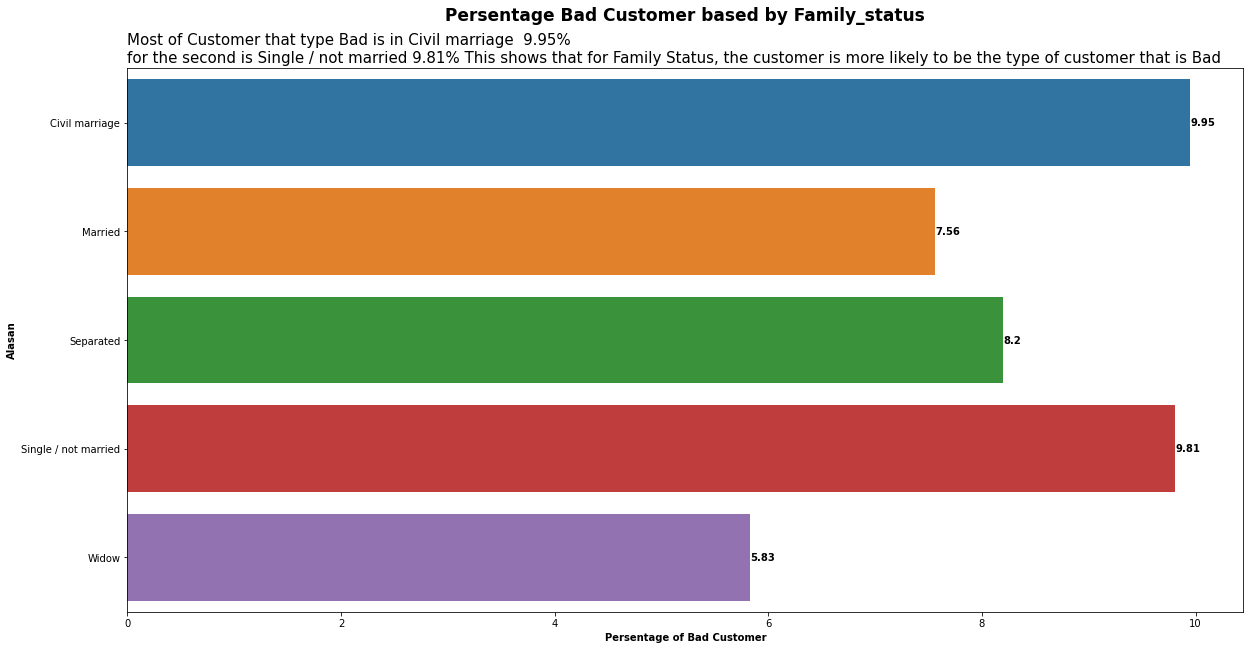

In [60]:
fig,ax= plt.subplots(figsize=(20,10))
sns.barplot(x='Bad_Cus_persentage', y='Family_status', data=df_joker, palette ="tab10");

for label in ax.containers:
    ax.bar_label(label,fontweight='bold')
    
plt.title('Persentage Bad Customer based by Family_status\n\n', fontsize=17, fontweight='bold')
plt.title('Most of Customer that type Bad is in Civil marriage  9.95% \n' 
          'for the second is Single / not married 9.81% This shows that for Family Status, the customer is more likely to be the type of customer that is Bad ', 
          fontsize =15, loc='left')

plt.ylabel('Alasan',fontweight='bold')
plt.yticks(np.arange(5), ['Civil marriage','Married','Separated','Single / not married','Widow'])

plt.xlabel('Persentage of Bad Customer',fontweight='bold')
plt.show()

Persentase yang ditunjukkan merupakan persentase Customer yang buruk, dari plot tersebut diperlihatkan paling besar persentase kustomer buruk(Bad) yaitu pada Family Status Civil Mariage sebesar 9.95%

## 3. Pengaruh Income Type dan Housing Type dengan jumlah customer

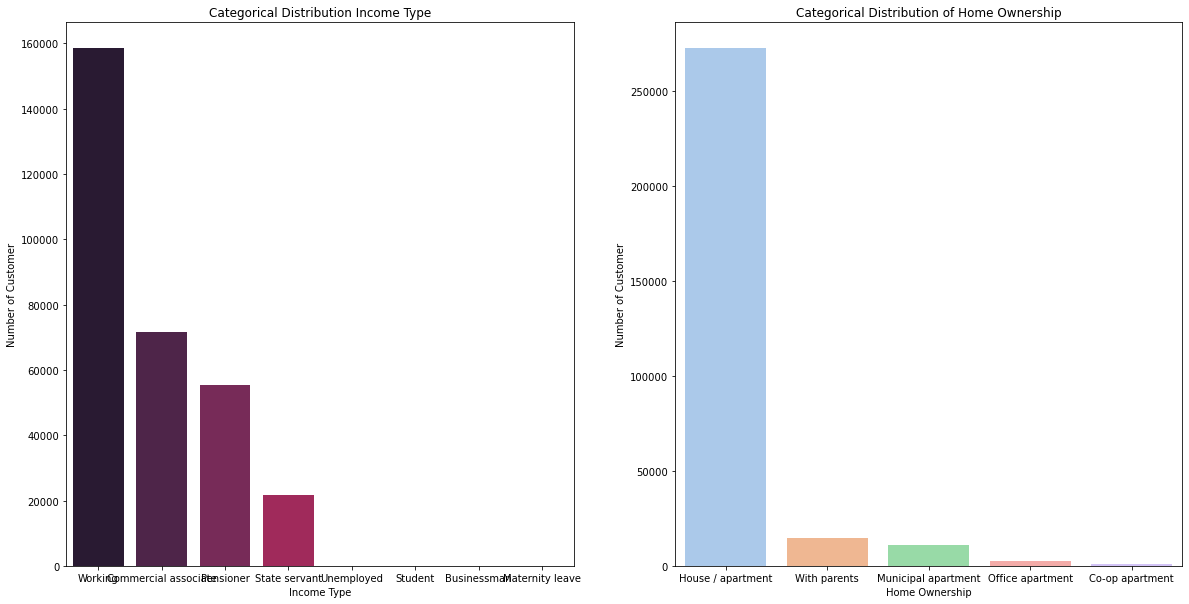

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.barplot(ax=axes[0], x=df_ins['NAME_INCOME_TYPE'].value_counts().index, y=df_ins['NAME_INCOME_TYPE'].value_counts().values, palette='rocket', order=['Working', 'Commercial associate', 'Pensioner', 'State servant', 'Unemployed', 'Student', 'Businessman', 'Maternity leave'])
axes[0].set_title('Categorical Distribution Income Type')
axes[0].set_xlabel('Income Type')
axes[0].set_ylabel('Number of Customer')

sns.barplot(ax=axes[1], x=df_ins['NAME_HOUSING_TYPE'].value_counts().index, y=df_ins['NAME_HOUSING_TYPE'].value_counts().values, palette='pastel', order=['House / apartment', 'With parents', 'Municipal apartment', 'Office apartment', 'Co-op apartment'])
axes[1].set_title('Categorical Distribution of Home Ownership')
axes[1].set_xlabel('Home Ownership')
axes[1].set_ylabel('Number of Customer')

plt.show()

Kedua plot diatas menunjukkan bagaimana pengaruh kolom Income Type dan Home ownership terhadap jumlah customer yang ada, dan dapat dilihat bahwa pada Income Type banyak customer pada Working danCommercial associate sedangkan untuk Home ownership banyak pada House / apartment dan With parents yang menunjukkan tingkatan dari kustomer dan kebutuhan kredit berdasarkan jenis Pendapatan dan jenis tempat tinggal

# Preprocessing machine learning

In [67]:
df_usen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307221 entries, 0 to 307510
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307221 non-null  int64  
 1   TARGET                      307221 non-null  int64  
 2   CNT_CHILDREN                307221 non-null  int64  
 3   FLAG_PHONE                  307221 non-null  int64  
 4   HOUR_APPR_PROCESS_START     307221 non-null  int64  
 5   AMT_INCOME_TOTAL            307221 non-null  float64
 6   AMT_CREDIT                  307221 non-null  float64
 7   AMT_ANNUITY                 307221 non-null  float64
 8   AMT_GOODS_PRICE             307221 non-null  float64
 9   REGION_POPULATION_RELATIVE  307221 non-null  float64
 10  NAME_TYPE_SUITE             307221 non-null  object 
 11  NAME_INCOME_TYPE            307221 non-null  object 
 12  NAME_EDUCATION_TYPE         307221 non-null  object 
 13  NAME_FAMILY_ST

In [69]:
df_usen.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307221.0,278170.730087,102788.457585,100002.00000,189141.000000,278194.00000,367126.000000,4.562550e+05
TARGET,307221.0,0.080737,0.272431,0.00000,0.000000,0.00000,0.000000,1.000000e+00
CNT_CHILDREN,307221.0,0.416977,0.722047,0.00000,0.000000,0.00000,1.000000,1.900000e+01
FLAG_PHONE,307221.0,0.280645,0.449315,0.00000,0.000000,0.00000,1.000000,1.000000e+00
HOUR_APPR_PROCESS_START,307221.0,12.063020,3.265941,0.00000,10.000000,12.00000,14.000000,2.300000e+01
AMT_INCOME_TOTAL,307221.0,168832.558464,237219.922239,25650.00000,112500.000000,148500.00000,202500.000000,1.170000e+08
AMT_CREDIT,307221.0,599316.310335,402519.599415,45000.00000,270000.000000,514602.00000,808650.000000,4.050000e+06
AMT_ANNUITY,307221.0,27120.452357,14492.106811,1615.50000,16551.000000,24916.50000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307221.0,538397.345875,369448.369925,40500.00000,238500.000000,450000.00000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307221.0,0.020870,0.013832,0.00029,0.010006,0.01885,0.028663,7.250800e-02


In [70]:
# memeriksa nilai duplikat
df_usen.duplicated().sum()

0

<AxesSubplot:>

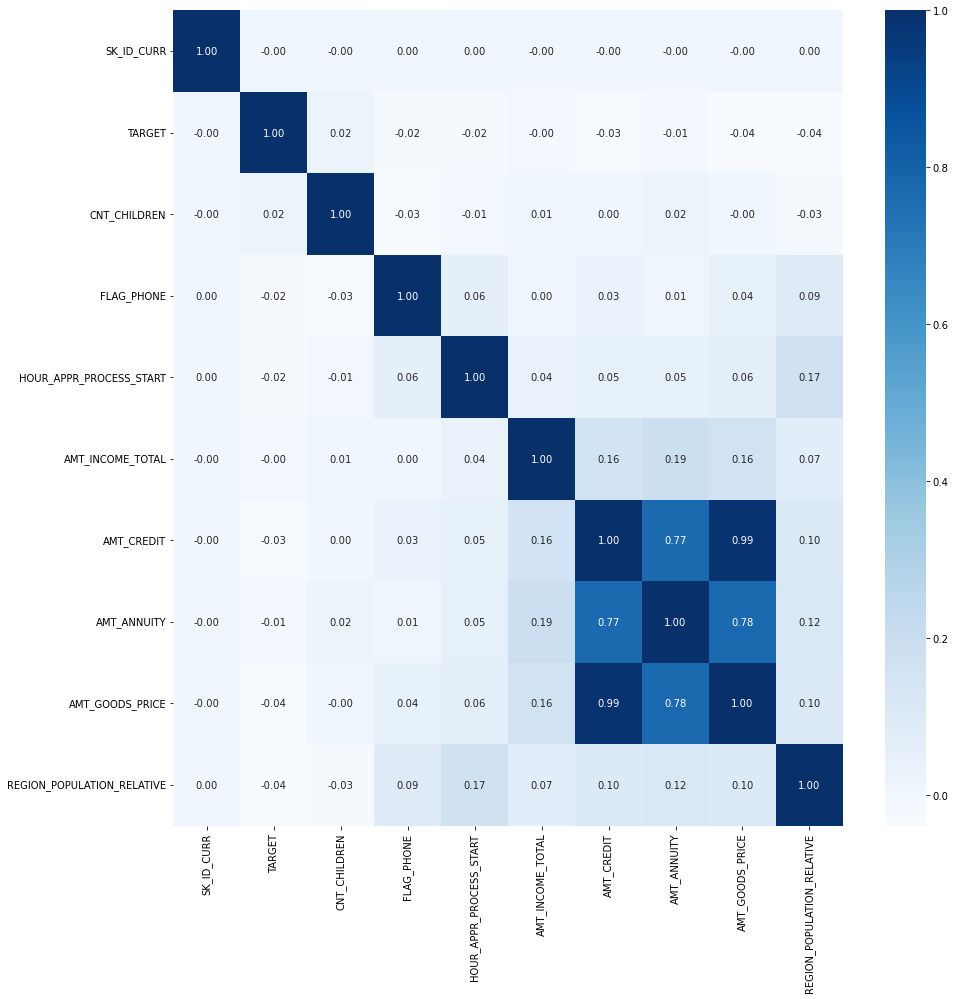

In [71]:
# correlation heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(df_usen.corr(), cmap='Blues', annot=True, fmt='.2f')

Dari hasil correlasi AMT_GOODS_PRICE memiliki nilai correlasi yang besar dengan AMT_CREDIT dan AMT_ANNUITY yang berarti lebih baik kolom ini di hapus

In [73]:
# dihapus berdasarkan hasil korelasi dan unique ID
df_usen = df_usen.drop(['SK_ID_CURR','AMT_GOODS_PRICE'],axis=1)

In [79]:
df_ml = df_usen.copy()

In [81]:
# extracted Feature and target berdasarkan numerik dan kategori 
num = ['CNT_CHILDREN','FLAG_PHONE','HOUR_APPR_PROCESS_START','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE']
cat = ['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
tar = ['TARGET']
use2 = num+cat+tar
df_use2 = df_ml[use2]

In [82]:
# menghapus data Outlier
from scipy import stats 
 
df_outliers = df_use2.copy()
nums = num

print(f'Jumlah baris sebelum memfilter outlier: {len(df_outliers)}')

filtered_entries = np.array([True] * len(df_outliers))

for col in nums:
    zscore = abs(stats.zscore(df_outliers[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_outliers = df_outliers[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_outliers)}') #cek yang dihapus data seperti apa, hubungan antar fitur, masuk akal gak

Jumlah baris sebelum memfilter outlier: 307221
Jumlah baris setelah memfilter outlier: 289071


Dilakukan proses preprocessing data untuk mengurangi feature berdasarkan hasil nilai distribusinya, nilai correlasi, duplikasi dan juga outlier yang ada 

# Feature Encoding

In [84]:
# menunjukkan nilai unik kolom kategorical yang akan di encode

df_enc = df_use2.copy()
for col in cat:
  print(f'value counts of column {col}')
  print(df_enc[col].value_counts())
  print('---'*10, '\n')

value counts of column NAME_TYPE_SUITE
Unaccompanied      248515
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
No Type              1014
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
------------------------------ 

value counts of column NAME_INCOME_TYPE
Working                 158583
Commercial associate     71567
Pensioner                55339
State servant            21677
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64
------------------------------ 

value counts of column NAME_EDUCATION_TYPE
Secondary / secondary special    218186
Higher education                  74793
Incomplete higher                 10266
Lower secondary                    3812
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64
------------------------------ 

value coun

In [85]:
# label encoder
# grade
mapping_NAME_EDUCATION_TYPE = {
    'Secondary / secondary special' : 0,
    'Higher education' : 1,
    'Incomplete higher' : 2,
    'Lower secondary' : 3,
    'Academic degree' : 4
}

df_enc['EDUCATION_mapped'] = df_enc['NAME_EDUCATION_TYPE'].map(mapping_NAME_EDUCATION_TYPE)


df_enc = df_enc.drop(['NAME_EDUCATION_TYPE'],axis=1)

In [87]:
# Feature encode seluruh tipe kategorical,
df_onehot = df_enc.copy()
for cat in ['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']:
    onehots = pd.get_dummies(df_onehot[cat], prefix=cat)
    df_onehot = df_onehot.join(onehots)

In [88]:
df_onehot = df_onehot.drop(['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE'],axis=1)
df_onehot.sample(10)

,CNT_CHILDREN,FLAG_PHONE,HOUR_APPR_PROCESS_START,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,TARGET,EDUCATION_mapped,NAME_TYPE_SUITE_Children,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
209679,0,1,7,166500.0,315000.0,22918.5,0.025164,0,0,0,...,1,0,0,0,0,1,0,0,0,0
33922,0,0,12,157500.0,727785.0,23607.0,0.006671,0,1,0,...,1,0,0,0,0,0,0,0,0,1
11764,2,0,13,225000.0,640080.0,29970.0,0.004960,0,1,0,...,1,0,0,0,0,1,0,0,0,0
198298,0,0,10,180000.0,1007761.5,42826.5,0.035792,0,1,0,...,1,0,0,0,0,1,0,0,0,0
100544,0,0,13,135000.0,1221354.0,35842.5,0.035792,0,0,0,...,1,0,0,0,0,1,0,0,0,0
239706,0,0,11,112500.0,202500.0,10125.0,0.022625,0,0,0,...,1,0,0,0,0,1,0,0,0,0
244062,2,1,11,67500.0,585000.0,28143.0,0.028663,1,0,0,...,1,0,0,0,0,1,0,0,0,0
187151,1,0,16,270000.0,1339884.0,39307.5,0.009657,1,1,0,...,1,0,0,0,0,1,0,0,0,0
86384,0,0,15,292500.0,668304.0,34254.0,0.025164,0,1,0,...,1,0,0,0,0,1,0,0,0,0
247777,1,0,10,135000.0,352422.0,27400.5,0.035792,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [89]:
df_onehot.sample(5).T

,210545,263691,282408,295977,83605
CNT_CHILDREN,1.00000,0.000000,1.000000,0.000000,0.000000
FLAG_PHONE,1.00000,1.000000,0.000000,0.000000,0.000000
HOUR_APPR_PROCESS_START,14.00000,12.000000,10.000000,16.000000,15.000000
AMT_INCOME_TOTAL,103500.00000,180000.000000,90000.000000,121500.000000,189000.000000
AMT_CREDIT,534204.00000,904500.000000,254700.000000,187704.000000,580500.000000
AMT_ANNUITY,41472.00000,38452.500000,20250.000000,12123.000000,18724.500000
REGION_POPULATION_RELATIVE,0.02461,0.026392,0.011703,0.025164,0.028663
TARGET,0.00000,0.000000,1.000000,0.000000,0.000000
EDUCATION_mapped,0.00000,0.000000,1.000000,0.000000,0.000000
NAME_TYPE_SUITE_Children,0.00000,0.000000,0.000000,0.000000,0.000000


Dilakukan Encode Featire yang telah terpilih, untuk kategorik dilakukan feature encode label untuk feature NAME_EDUCATION_TYPE yang dapat diurutkan niainya (ordinal) dan onehot untuk kategorik purpose yang nominal

### Distribusi Customer Good and Bad

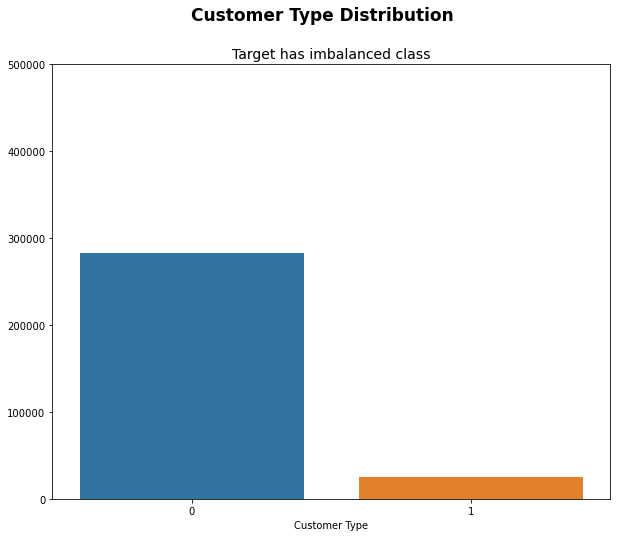

In [91]:
counts = df_onehot['TARGET'].value_counts()

plt.figure(figsize=(10,8))

ax = sns.barplot(x=counts.index,y=counts)
ax.set(xlabel='Customer Type')
ax.set(ylabel=None)

plt.suptitle('Customer Type Distribution', fontsize=17, fontweight='bold')
plt.title('Target has imbalanced class', fontsize=14)
plt.ylim(0,500000)
plt.show()

Setelah dilakukan pengecekan nilai data berdasarkan target diketahui bahwa data yang dimiliki imbalance dan akan dilakukan proses Handling Imbalance data 

# Split Data dan Imbalance Data 

In [94]:
df_split = df_onehot.copy()

# Split Feature and Target
x = df_split.drop(['TARGET'],axis=1)
y = df_split['TARGET'] # target 

In [95]:
# import library, digunakan beberapa algoritma 
from imblearn.over_sampling import SMOTE

from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler(0.5).fit_resample(x, y)
X_over, y_over = over_sampling.RandomOverSampler(0.5).fit_resample(x, y)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.5).fit_resample(x, y)

In [96]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
0    282417
1     24804
Name: TARGET, dtype: int64


UNDERSAMPLING
0    49608
1    24804
Name: TARGET, dtype: int64


OVERSAMPLING
0    282417
1    141208
Name: TARGET, dtype: int64


SMOTE
0    282417
1    141208
Name: TARGET, dtype: int64


Menggunakan beberapa algoritma untuk handling imbalance data akan dipilih hasil yang diasumsikan paling baik, dari hasil diatas didapat hasil data yang masih banyak dan mendekati yaitu pada Oversampling atau SMOTE, pada projek ini akan digunakan metode SMOTE

In [97]:
#Splitting the data into Train and Test
xtrain, xtest, ytrain, ytest = train_test_split(X_over_SMOTE, y_over_SMOTE, test_size = 0.3, random_state = 42)

In [98]:
result = experiment(xtrain,xtest,ytrain,ytest)
result = pd.DataFrame(result)

In [99]:
result

,model_name,model,accuracy,recall,precision,duration
0,K-Nearest Neighbor,KNeighborsClassifier(),0.780554,0.674755,0.668253,0.068017
1,Logistic Regression,LogisticRegression(),0.667616,0.000000,0.000000,0.775886
2,Decision Tree,DecisionTreeClassifier(),0.873843,0.832962,0.796730,1.884757
3,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.927397,0.790067,0.989358,37.070396
4,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.904617,0.714218,0.998345,39.764008


Split data yang dilakukan yaitu Test data 30:70 Training data, dan hasil modeling yang didapat dengan menggunakan beberapa algoritma, hasil model paling baik akan menggunakan nilai precission terbaik yaitu Random Forest dengan nilai preccision paling tinggi dengan nilai 0.927397 atau 92.74% 

# Evaluation

## Confusion Matrix

In [100]:
final_model = result['model'][3]
ypred = final_model.predict(xtest)

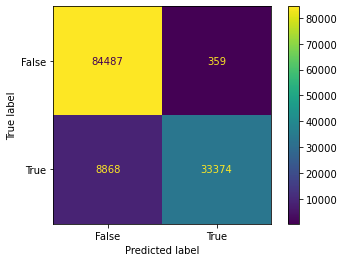

In [101]:
cm = confusion_matrix(ytest,ypred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = [False, True])

disp.plot()
plt.show()

Untuk menentukan model terbaik ditentukan dengan nilai precission karena lebih tepat untuk problem penentuan customer yang baik atau buruk, Algoritma model terbaik yaitu Random Forest dengan perhitungan precission yaitu :

* Precission = True Positif / (True Positif + False Positif) = 33374 /(33374+359) = 92.7%

## Feature Importance

In [102]:
feature_imp = {}

feature_imp['columns'] = xtrain.columns
feature_imp['feature_imp'] = result['model'][3].feature_importances_

In [103]:
df_feature_imp = pd.DataFrame(feature_imp)
df_feature_imp = df_feature_imp.sort_values(['feature_imp'],ascending=False).head(20)

<AxesSubplot:xlabel='feature_imp', ylabel='columns'>

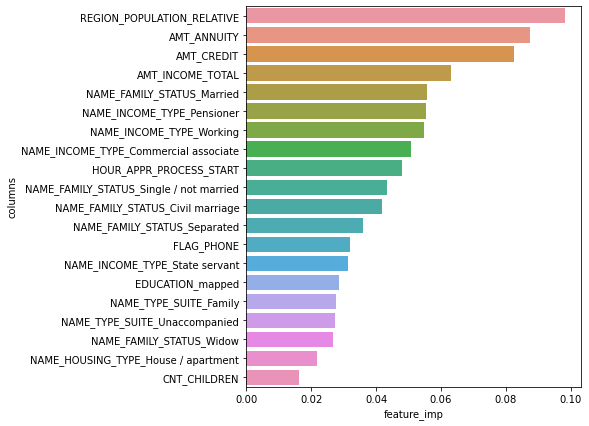

In [104]:
plt.figure(figsize=(6,7))
sns.barplot(x=df_feature_imp['feature_imp'],y=df_feature_imp['columns'])

feature importance yang didapatkan dari model dengan algoritma Decision Tree, 5 feature tertinggi yaitu :
1. Region Pupulation Relative = jumlah Populasi di wilayah
2. AMT_ANNUITY = Jumlah ANNUITY
3. AMT_CREDIT= Jumlah Credit
4. AMT_INCOME_TOTAL = Jumlah Total Pendapatan
5. NAME_FAMILY_STATUS_Married = Customer yang memiliki Family Status Married